In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

# Performance
print("Lasso Regression:")
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


Lasso Regression:
Training MSE: 0.6718399298159432
Test MSE: 0.6796290284328821


In [ ]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

# Performance
print("Ridge Regression:")
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


Ridge Regression:
Training MSE: 0.5179331264555785
Test MSE: 0.5558879138674184


In [ ]:
# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = elastic_net.predict(X_train_scaled)
y_test_pred = elastic_net.predict(X_test_scaled)

# Performance
print("Elastic Net Regression:")
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


Elastic Net Regression:
Training MSE: 0.6272675101715952
Test MSE: 0.6358566879910775


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a neural network model with Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

# Evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
test_mse = model.evaluate(X_test_scaled, y_test, verbose=0)

print("Neural Network with Dropout:")
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)


Neural Network with Dropout:
Training MSE: 0.31313347816467285
Test MSE: 0.3264659643173218


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Create a neural network model
model_es = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model_es.compile(optimizer='adam', loss='mse')

# Early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history_es = model_es.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0, callbacks=[early_stopping])

# Evaluate the model
train_mse_es = model_es.evaluate(X_train_scaled, y_train, verbose=0)
test_mse_es = model_es.evaluate(X_test_scaled, y_test, verbose=0)

print("Neural Network with Early Stopping:")
print("Training MSE:", train_mse_es)
print("Test MSE:", test_mse_es)


Neural Network with Early Stopping:
Training MSE: 0.22908619046211243
Test MSE: 0.2747601270675659


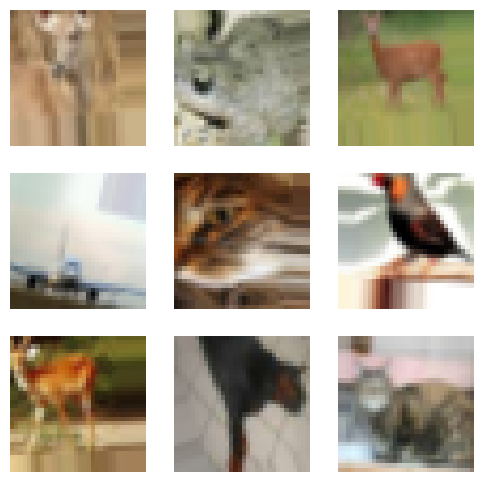

Epoch 1/2
1563/1563 - 98s - loss: 1.8652 - accuracy: 0.2974 - val_loss: 1.4962 - val_accuracy: 0.4615 - 98s/epoch - 63ms/step
Epoch 2/2
1563/1563 - 84s - loss: 1.5727 - accuracy: 0.4267 - val_loss: 1.2620 - val_accuracy: 0.5443 - 84s/epoch - 54ms/step
Neural Network with Data Augmentation:
Training Accuracy: 0.5422599911689758
Test Accuracy: 0.5443000197410583


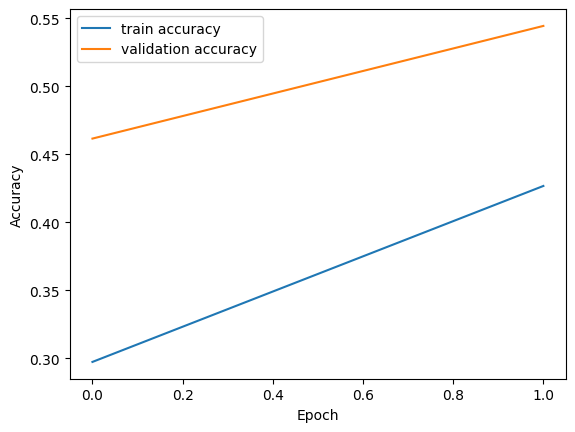

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create an ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the generator to the training data
datagen.fit(X_train)

# Visualize some augmented images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    plt.show()
    break

# Create a neural network model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=2, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Neural Network with Data Augmentation:")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
